### 📈 可视化

#### ⭐ 小图

/tmp/ipykernel_2049/3702650160.py:147: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=0.1, hspace=0.1)


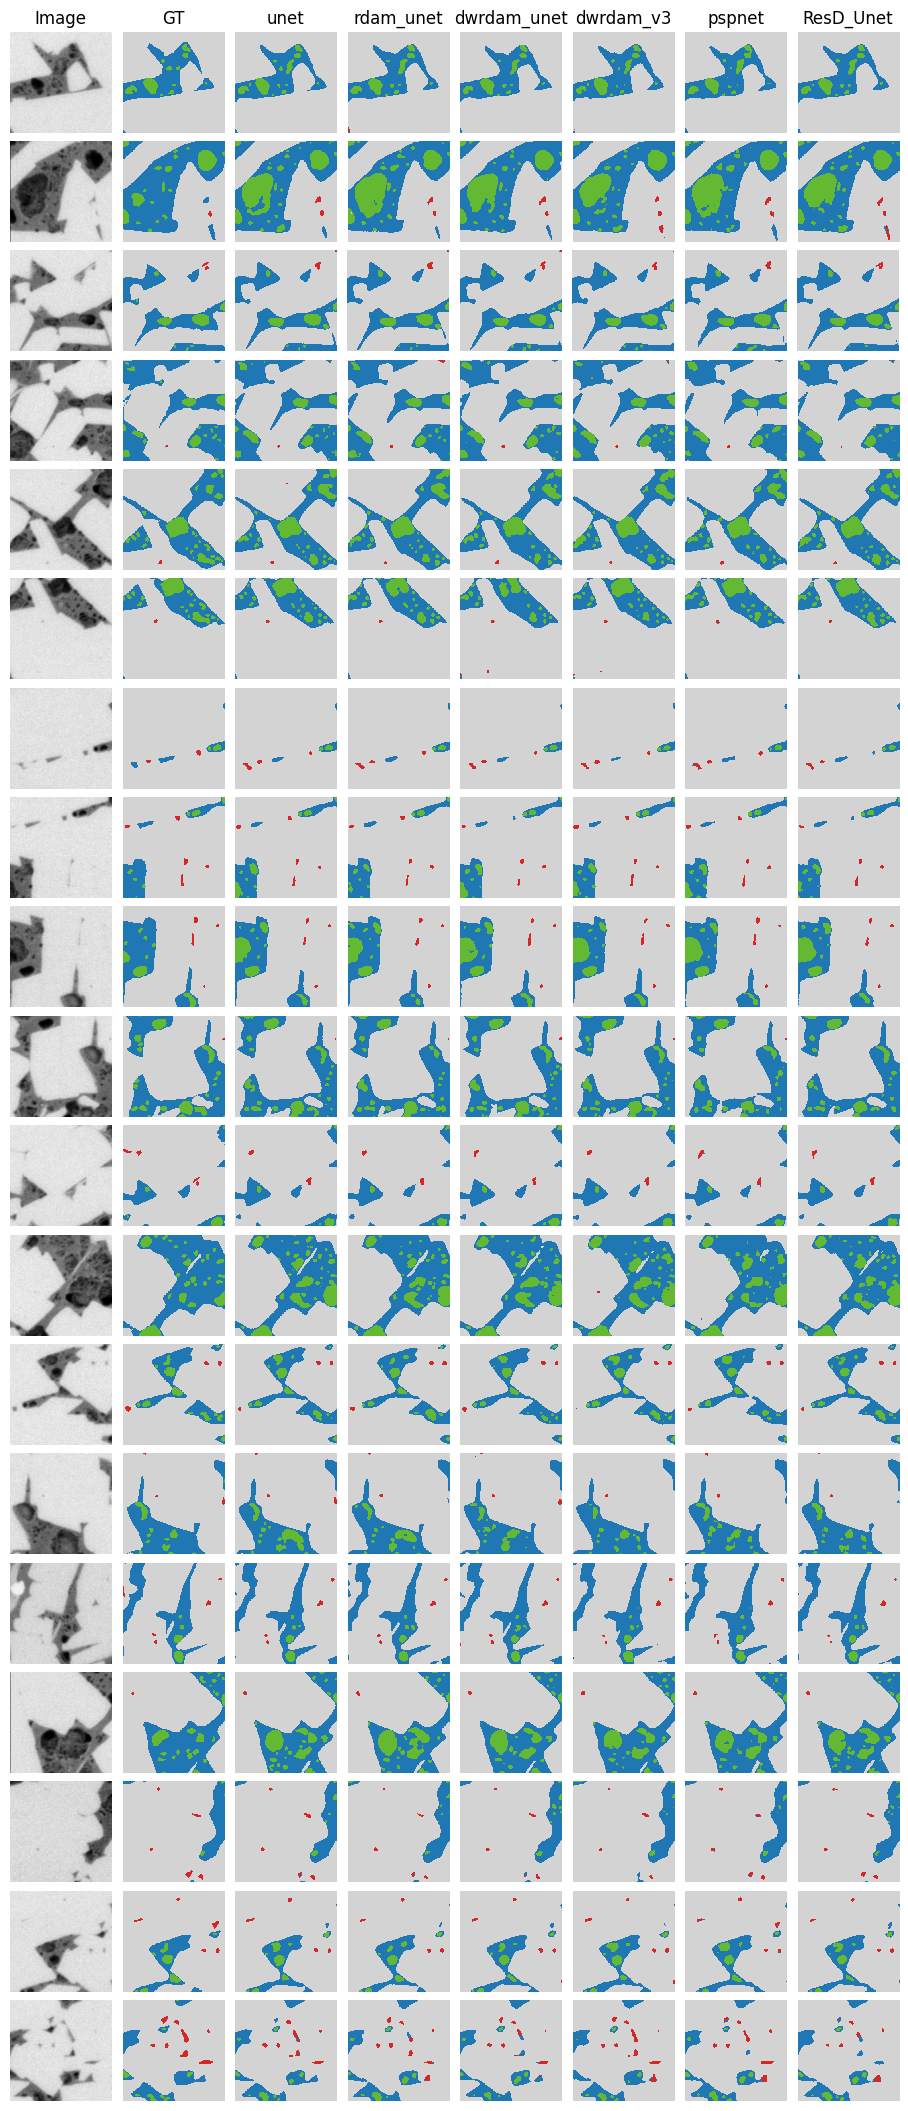

In [79]:
import os
import cv2
import sys
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import logging

# 配置日志记录器
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# 定义自定义颜色列表
colors = ['#D3D3D3', '#1f77b4', '#63b931', '#d62728']
custom_cmap = ListedColormap(colors)

def get_small_predict_path(model_name):
    pwd = os.getcwd()
    model_path = os.path.join(pwd, 'results', 'predict', model_name, 'pred_img', 'V2')
    list_preds = os.listdir(model_path)
    sorted_preds = sorted(list_preds)
    path = os.path.join(model_path, sorted_preds[-1])
    logging.info(f"Latest prediction path: {path}")

    # Check if the model path exists
    if not os.path.exists(model_path):
        print(f"Model path '{model_path}' does not exist.")
        sys.exit(1)
    return path

def get_img_name(img_list, i):
    lens = len(img_list)
    logging.info(f"Image list length: {lens}")
    logging.info(f"Image name: {img_list[i]}")
    return img_list[i]

def get_origin_img_path(root_path, img_name):
    img_path = os.path.join(root_path, img_name + '.jpg')
    logging.info(f"Original image path: {img_path}")
    return img_path

def get_mask_path(mask_root_path, img_name):
    mask_path = os.path.join(mask_root_path, img_name + '.png')
    logging.info(f"Mask path: {mask_path}")
    return mask_path

def get_pred_path(model_name, img_name):
    root_path = get_small_predict_path(model_name)
    pred_path = os.path.join(root_path, img_name + '.png')
    logging.info(f"Prediction path: {pred_path}")
    if not os.path.exists(pred_path):
        raise FileNotFoundError(f"预测文件 {pred_path} 不存在")
    return pred_path

def visualization(mask, colors):
    # 获取掩码中所有唯一的标签值
    unique_labels = np.unique(mask)
    colors = [colors[label] for label in unique_labels]
    # 创建自定义颜色映射
    cmap = ListedColormap(colors)

    plt.imshow(mask, cmap=cmap, interpolation='nearest')
    plt.axis('off')

# data info
img_names_list = ['Image1 - 003_crop089_aug17', 
                  'Image1 - 003_crop091_aug7', 
                  'Image1 - 003_crop094_aug5', 
                  'Image1 - 003_crop095_aug32', 
                  'Image1 - 003_crop097_aug22',
                  'Image1 - 003_crop098_aug5',
                  'Image1 - 003_crop100_aug27',
                  'Image1 - 003_crop101_aug55',
                  'Image1 - 003_crop102_aug6',
                  'Image1 - 003_crop103_aug24',
                  'Image1 - 003_crop104_aug20',
                  'Image1 - 003_crop105_aug25',
                  'Image1 - 003_crop106_aug33',
                  'Image1 - 003_crop108_aug21',
                  'Image1 - 003_crop110_aug33',
                  'Image1 - 003_crop112_aug36',
                  'Image1 - 003_crop114_aug25',
                  'Image1 - 003_crop115_aug20',
                  'Image1 - 003_crop116_aug38',
             ]
models = [
          'unet',
          'rdam_unet',
          'dwrdam_unet',
        #   'a_unet',
        #   'a_unetv2',
        #   'm_uent',
        #   'aicunet',
        #   'vm_unet',
        #   'dc_unet',
        #   'dwrdam_unetv2',
          'dwrdam_unetv3',
        #   'dwrdam_unetv4',
        'pspnet',
        #   'deeplabv3',
        #   'Segnet',
        'ResD_Unet',
        ]

img_root_path = "/mnt/e/VScode/WS-Hub/WS-UNet/UNet/datasets/aug_results/images/256/time_60/test"
mask_root_path = "/mnt/e/VScode/WS-Hub/WS-UNet/UNet/datasets/aug_results/masks/256/time_60/test"

# 可视化
num_img = len(img_names_list)
num_models = len(models)
plt.figure(figsize=(num_models+3, num_img+2), constrained_layout=True)
for row_idx in range(num_img):  
    name = get_img_name(img_names_list, row_idx)

    # 显示原图
    plt.subplot(num_img, num_models+2, row_idx*(num_models+2) + 1)
    img_path = get_origin_img_path(img_root_path, name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    if row_idx == 0:
        plt.title("Image")

    # 显示GT
    plt.subplot(num_img, num_models+2, row_idx*(num_models+2) + 2)
    gt_path = get_mask_path(mask_root_path, name)
    gt = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)
    visualization(gt, colors)
    if row_idx == 0:
        plt.title("GT")

    # 显示各模型预测结果
    for col_idx, model_name in enumerate(models):  
        position = row_idx*(num_models+2) + 3 + col_idx  # 计算子图位置
        plt.subplot(num_img, num_models+2, position)
        pred_path = get_pred_path(model_name, name)
        if pred_path:
            pred = cv2.imread(pred_path, cv2.IMREAD_GRAYSCALE)
            visualization(pred, colors)
            if row_idx == 0:  # 只在第一行显示标题
                if len(model_name) > 11:
                    model_name = model_name.split('_')[0] + '_' + model_name.split('_')[1][-2:] 
                plt.title(f"{model_name}")
        else:
            plt.imshow(np.zeros_like(img), cmap=custom_cmap, interpolation='nearest') 
        plt.axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

#### ⭐ 大图

/tmp/ipykernel_2049/645635169.py:58: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=0.1, hspace=0.1)


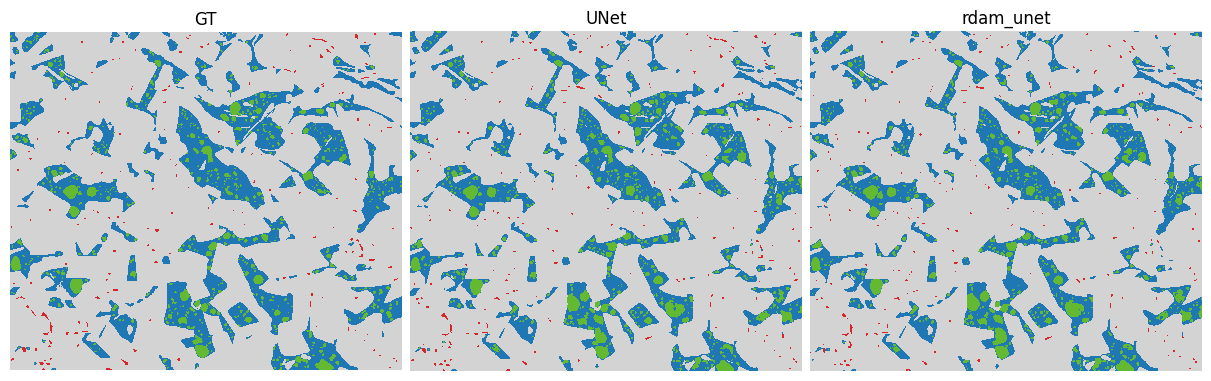

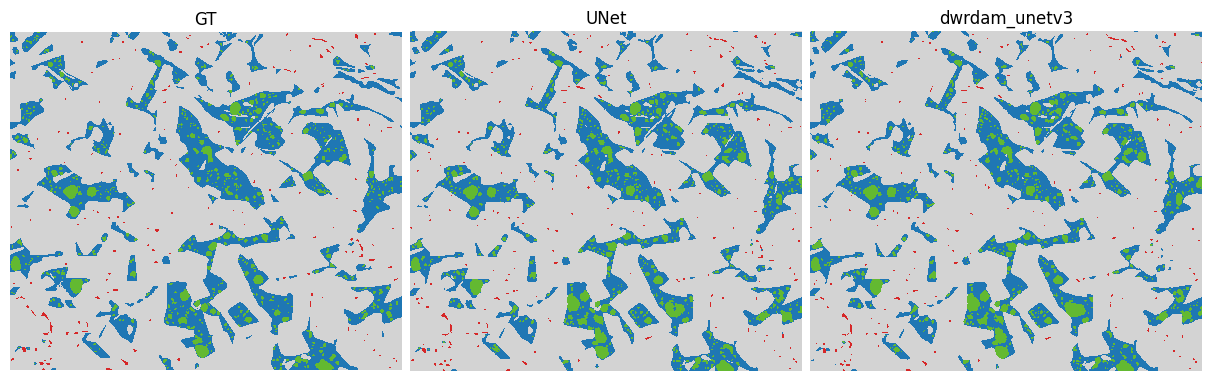

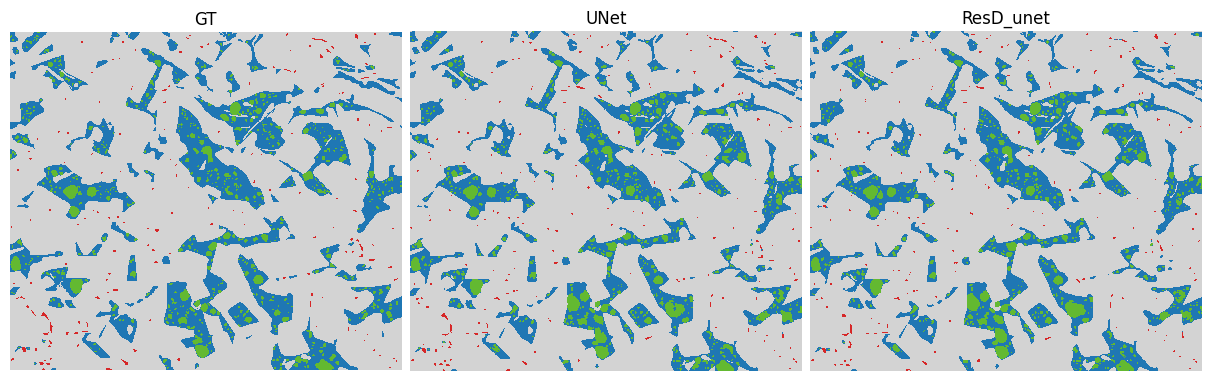

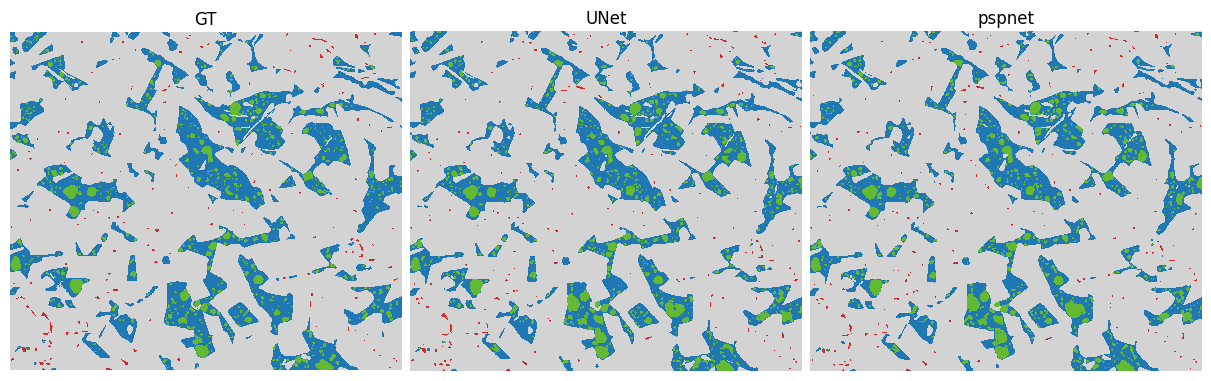

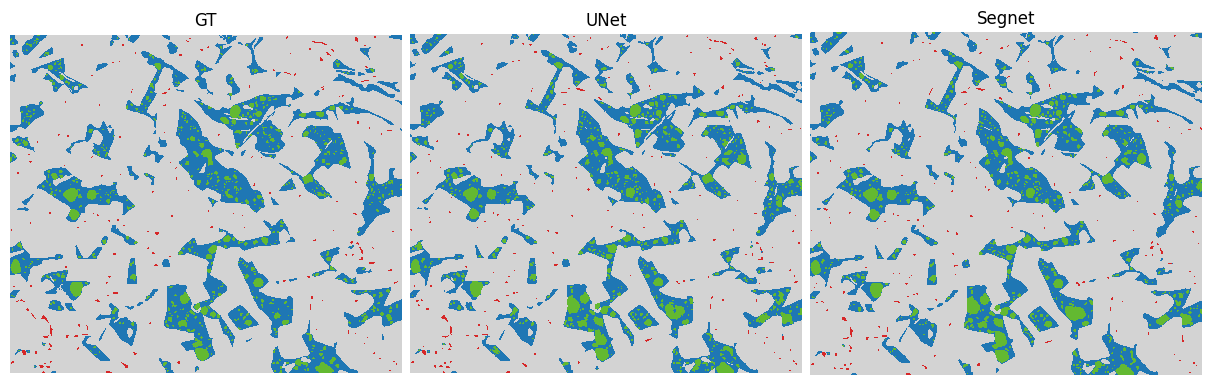

In [80]:
import os
import cv2
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import logging

# 配置日志记录器
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# 定义自定义颜色列表
colors = ['#D3D3D3', '#1f77b4', '#63b931', '#d62728']
custom_cmap = ListedColormap(colors)

def get_single_predict_path(model_name, slide=False):
    pwd = os.getcwd()
    if slide:
        pred_path = pwd + '/results/' + 'single_predict/' + model_name + '_sliding.png'
    else:
        pred_path = pwd + '/results/' + 'single_predict/' + model_name + '.png'
    return pred_path

models = [
          'rdam_unet',
        #   'dwrdam_unet',
          'dwrdam_unetv3',
        #   'a_unet',
        #   'a_unetv2',
        #   'm_uent',
        #   'aicunet',
        #   'vm_unet',
        #   'dc_unet',
        #   'dwrdam_unetv2',
        #   'dwrdam_unetv3',
        #   'dwrdam_unetv4',
          'ResD_unet',
          'pspnet',
          'Segnet',
        ]

img = "/mnt/e/VScode/WS-Hub/WS-UNet/UNet/Image1 - 003.jpeg"
mask = "/mnt/e/VScode/WS-Hub/WS-UNet/UNet/Image1 - 003.png"
img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
mask = cv2.imread(mask, cv2.IMREAD_GRAYSCALE)
flag = False
U_pred = get_single_predict_path('unet', slide=flag)
U_pred = cv2.imread(U_pred, cv2.IMREAD_GRAYSCALE)
# 可视化
for id_index, model_name in enumerate(models):
    plt.figure(figsize=(12, 4), constrained_layout=True)
    plt.subplot(1, 3, 1)
    plt.imshow(mask, cmap=custom_cmap, interpolation='nearest'), plt.axis('off'), plt.title("GT")
    plt.subplot(1, 3, 2)
    plt.imshow(U_pred, cmap=custom_cmap, interpolation='nearest'), plt.axis('off'), plt.title("UNet")
    plt.subplot(1, 3, 3)
    pred_path = get_single_predict_path(model_name, slide=flag)
    pred = cv2.imread(pred_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(pred, cmap=custom_cmap, interpolation='nearest'), plt.axis('off'), plt.title(f"{model_name}")
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

### 📕 模型指标

🔖 符号：
- ✅ 已完成实验
- ⚠️ 数据异常/需验证
- 🚧 实验进行中 
- ❌ 实验失败
- 🔍 待分析
- ⬜ 未开始


|     *模型类型*    | *参数量* | *数据集* | *mIoU(%)* | *Dice(%)* | *F1(%)* |*Recall(%)*| *Precision(%)* | *Acc(%)* |*训练时间*|*显存占用*|  *LR*  |  *WD*  |   *dropout*   |
|:----------------:|:-------:|:--------:|:---------:|:---------:|:-------:|:---------:|:--------------:|:--------:|:--------:|:-------:|:------:|:------:|:-------------:|
| unet✅           |  2.9M   |    V1    |   55.46   |   65.81   |  66.98  |   65.85   |      69.11     |  97.88   |   ----   |   ---   |  8e-4  |  1e-6  |     0.5       |
| unet✅           |  2.9M   |    V2    |   59.23   |   71.47   |  72.76  |   73.23   |      73.40     |  97.97   |   ----   |   ---   |  8e-4  |  1e-4  |  0.5 渐近优化  |
| unet✅           |  2.9M   |    V2    | **60.04** | **72.14** |**73.45**| **74.44** |    **73.42**   |**97.91** |   ----   |   ---   |  1e-4  |  1e-4  |  0.5 渐近优化  |
| resd_unet✅      |  5.55M  |    V2    |   56.65↓  |   68.79↓  |  70.47↓ |   69.67↓  |      72.26↓    |  96.02   |   ----   |   ---   |  1e-4  |  1e-4  |  0.5 渐近优化  |
| a_unet⬜         |  4.4M   |    V2    |   -----   |   -----   |  -----  |   -----   |      -----     |  -----   |   ----   |   ---   |  1e-4  |  1e-4  |  0.5 渐近优化  |
| m_unet⬜         |  2.9M   |    V2    |   -----   |   -----   |  -----  |   -----   |      -----     |  -----   |   ----   |   ---   |  1e-4  |  1e-4  |  0.5 渐近优化  |
| rdam_unet✅🔍    |  7.06M  |    V2    |   57.85↓  |   70.17↓  |  71.78↓ |   72.24↓  |      72.28↓    |  97.85   |   ----   |   ---   |  1e-4  |  1e-4  |  0.5 渐近优化  |
| dwrdam_unet🚧    |  6.47M  |    V2    |   -----   |   -----   |  -----  |   -----   |      -----     |  -----   |   ----   |   5.8G  |  1e-4  |  1e-4  |  0.5 渐近优化  |
| dwrdam_unetv2⬜  |  2.12M  |    V2    |   -----   |   -----   |  -----  |   -----   |      -----     |  -----   |   ----   |   ---   |  1e-4  |  1e-4  |  0.5 渐近优化  |
| dwrdam_unetv3⬜  |  2.13M  |    V2    |   56.98↓  |   69.17↓  |  70.61↓ |   70.64↓  |      71.57↓    |  97.85↓  |   ----   |   ---   |  1e-4  |  1e-4  |  0.5 渐近优化  |
| dwrdam_unetv4⬜  |  -----  |    V2    |   -----   |   -----   |  -----  |   -----   |      -----     |  -----   |   ----   |   ---   |  1e-4  |  1e-4  |  0.5 渐近优化  |
| PSPNet✅         |  49.06M |    V2    |   56.15↓  |   68.80↓  |  70.21↓ |   71.17↓  |      70.15↓    |  97.69   | 17:40:30 |   ---   |  1e-4  |  1e-4  |      0.5      |
| SegNet✅         |  29.44M |    V2    |   55.54↓  |   67.45↓  |  69.26↓ |   68.29↓  |      71.49↓    |  97.85   | 12:29:04 |   ---   |  1e-4  |  1e-4  |      0.5      |
| DeepLabV3⬜      |  39.63M |    V2    |   -----   |   -----   |  -----  |   -----   |      -----     |  -----   |   ----   |   ---   |  1e-4  |  1e-4  |      0.5      |
| aic_unet⬜       |  6.44M  |    V2    |   -----   |   -----   |  -----  |   -----   |      -----     |  -----   |   ----   |   ---   |  1e-4  |  1e-4  |  0.5 渐近优化  |
| att_unet⬜       |  -----  |    V2    |   -----   |   -----   |  -----  |   -----   |      -----     |  -----   |   ----   |   ---   |  1e-4  |  1e-4  |  0.5 渐近优化  |
| dc_unet⬜        |  7.18M  |    V2    |   -----   |   -----   |  -----  |   -----   |      -----     |  -----   |   ----   |   ---   |  1e-4  |  1e-4  |  0.5 渐近优化  |
| vm_unet⬜        |  44.27M |    V2    |   -----   |   -----   |  -----  |   -----   |      -----     |  -----   |   ----   |   ---   |  1e-4  |  1e-4  |  0.5 渐近优化  |